In [ ]:
# Import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import scipy
import sklearn

In [22]:
# Chargement du dataset 
olist = pd.read_csv('olist.csv')

In [23]:
olist

,orders_nb,order_purchase_timestamp,nb_order_items,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,credit_card,boleto,voucher,debit_card,order_payment_type_nb,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1,2018-05-10 10:56:27,1,129.90,12.00,5.0,1,8,141.90,1,0,0,0,1,236.0,1.0,1500.0,34.0,7.0,32.0
1,1,2018-05-07 11:11:27,1,18.90,8.29,4.0,1,1,27.19,1,0,0,0,1,635.0,1.0,375.0,26.0,11.0,18.0
2,1,2017-03-10 21:05:03,1,69.00,17.22,3.0,1,8,86.22,1,0,0,0,1,177.0,3.0,1500.0,25.0,50.0,35.0
3,1,2017-10-12 20:29:41,1,25.99,17.63,4.0,1,4,43.62,1,0,0,0,1,1741.0,5.0,150.0,19.0,5.0,11.0
4,1,2017-11-14 19:45:42,1,180.00,16.89,5.0,1,6,196.89,1,0,0,0,1,794.0,3.0,6050.0,16.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95826,1,2017-06-08 21:00:36,3,785.00,248.71,5.0,1,10,2067.42,1,0,0,0,1,478.5,1.0,30000.0,55.0,75.0,61.0
95827,1,2017-12-10 20:07:56,1,64.89,19.69,4.0,1,1,84.58,1,0,0,0,1,506.0,2.0,1720.0,33.0,36.0,27.0
95828,1,2017-02-07 15:49:16,1,89.90,22.56,5.0,1,1,112.46,1,0,0,0,1,716.0,5.0,600.0,17.0,15.0,13.0
95829,1,2018-05-02 15:17:41,1,115.00,18.69,5.0,1,5,133.69,1,0,0,0,1,591.0,3.0,444.0,20.0,14.0,16.0


In [8]:
olist.order_purchase_timestamp = pd.to_datetime(olist.order_purchase_timestamp)

# Segmentation RFM

La segmentation RFM ou méthode RFM est une méthode de segmentation principalement développée à l'origine pour les actions de marketing direct des véadistes et qui s'applique désormais également aux acteurs du e-commerce et du commerce traditionnel.

La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.

Nous allons créer ces attributs pour chaque client.

Source : https://www.definitions-marketing.com/definition/segmentation-rfm/

## Récence

Pour calculer la récence, nous allons prendre en compte le dernier jour de commande répertoriée ainsi que le jour de la dernière commande effectuée par chaque client

In [18]:
RFM = olist[['order_purchase_timestamp']]
RFM['recency'] = olist.order_purchase_timestamp.max() - olist.order_purchase_timestamp
RFM['recency'] = RFM['recency'].dt.days
RFM.drop(columns=['order_purchase_timestamp'], inplace=True)

/tmp/ipykernel_4288/1052302628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['recency'] = olist.order_purchase_timestamp.max() - olist.order_purchase_timestamp
/tmp/ipykernel_4288/1052302628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['recency'] = RFM['recency'].dt.days
/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [19]:
RFM

,recency
0,111
1,114
2,536
3,320
4,287
...,...
95826,446
95827,261
95828,567
95829,118


## Fréquence

La fréquence désigne le nombre de fois que le client a effectué une commande. Elle équivaut à la variable orders_nb.

In [20]:
RFM['orders_nb'] = olist['orders_nb']

/tmp/ipykernel_4288/3148001046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['orders_nb'] = olist['orders_nb']


## Montant

Le montant correspond à la somme dépensée par chaque client. La variable payment_value y correspond.

In [40]:
RFM

,orders_nb,payment_value_per_order,recency
0,1,141.90,111
1,1,27.19,114
2,1,86.22,536
3,1,43.62,320
4,1,196.89,287
...,...,...,...
95826,1,2067.42,446
95827,1,84.58,261
95828,1,112.46,567
95829,1,133.69,118


## Nombre de clusters optimal

Méthode du coude (Kmeans Elbow) pour déterminer le nombre optimal de clusters de notre segmentation RFM

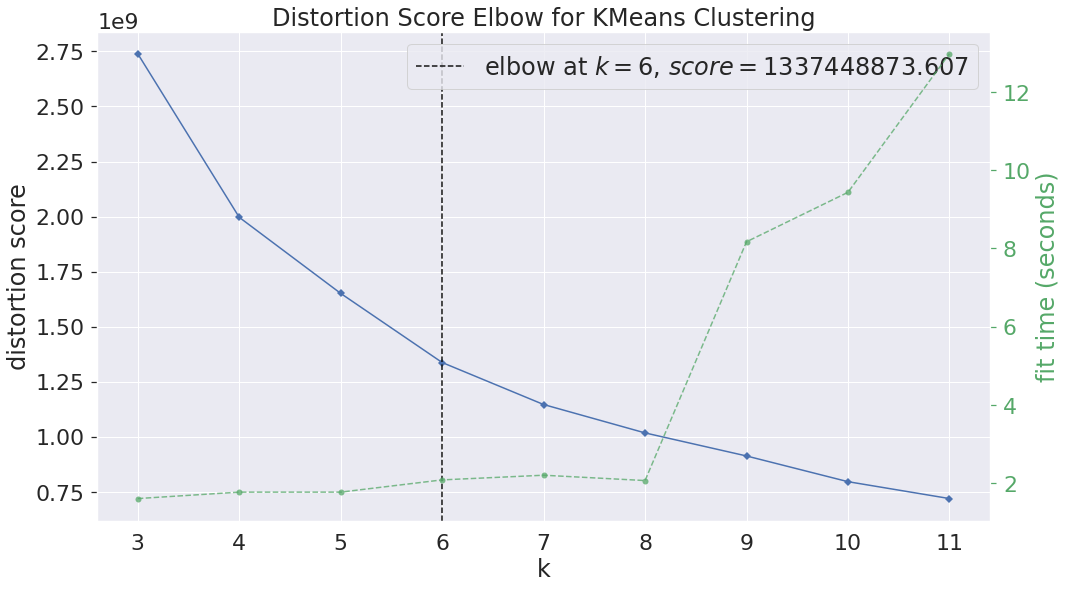

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 2)
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(RFM)   
visualizer.poof()    

In [48]:
model = KMeans(n_clusters=6, max_iter=10000)
model.fit_predict(RFM)
RFM['cluster'] = model.labels_

<AxesSubplot:xlabel='cluster', ylabel='count'>

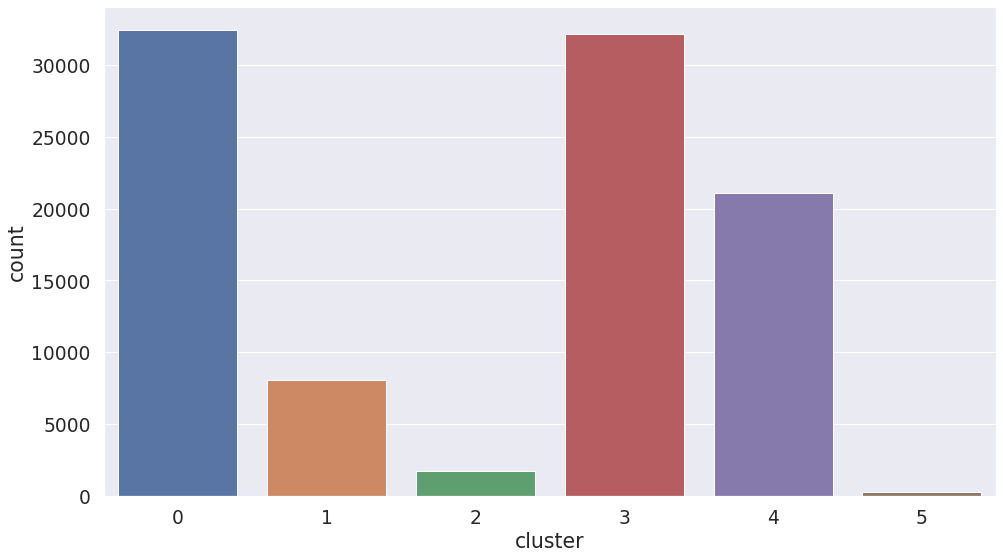

In [51]:
# Comptage des clusters 
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 1.7)
sns.countplot(data=RFM, x='cluster')

## Profil clients

Nous utiliserons la fonction describe qui nous fournit des statistiques sur le comportement des utilisateurs. Cela nous sera utile pour cerner le profil des utilisateurs de chaque segment.

In [59]:
RFM.describe()

,orders_nb,payment_value_per_order,recency,cluster
count,95831.000000,95831.000000,95831.000000,95831.000000
mean,1.075216,154.913935,238.965982,2.023719
std,0.373826,215.370976,152.855231,1.637697
min,1.000000,1.451333,0.000000,0.000000
25%,1.000000,58.220000,115.000000,0.000000
50%,1.000000,101.060000,220.000000,3.000000
75%,1.000000,171.635000,349.000000,3.000000
max,15.000000,13664.080000,695.000000,5.000000


In [52]:
RFM.loc[RFM.cluster==0].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,32459.000000,32459.000000,32459.000000,32459.0
mean,1.062849,108.121407,85.599834,0.0
std,0.351567,63.566921,49.606698,0.0
min,1.000000,2.027333,0.000000,0.0
25%,1.000000,56.780000,39.000000,0.0
50%,1.000000,94.485000,86.000000,0.0
75%,1.000000,148.870000,128.000000,0.0
max,15.000000,320.760000,177.000000,0.0


Client très récent. Montant dépensé en-dessous de la moyenne.

In [57]:
RFM.loc[RFM.cluster==1].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,8052.000000,8052.000000,8052.000000,8052.0
mean,1.015648,411.240155,218.149155,1.0
std,0.128059,118.681100,126.258642,0.0
min,1.000000,248.760000,0.000000,1.0
25%,1.000000,317.970000,122.750000,1.0
50%,1.000000,376.390000,206.000000,1.0
75%,1.000000,482.710000,295.000000,1.0
max,3.000000,723.000000,693.000000,1.0


Client moyennement récent. Montant 2.5 fois plus élevé que la moyenne.

In [53]:
RFM.loc[RFM.cluster==2].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,1755.000000,1755.000000,1755.000000,1755.0
mean,1.003989,1020.698459,244.572650,2.0
std,0.063047,254.927282,156.411693,0.0
min,1.000000,709.030000,3.000000,2.0
25%,1.000000,816.980000,112.000000,2.0
50%,1.000000,935.360000,225.000000,2.0
75%,1.000000,1193.430000,360.000000,2.0
max,2.000000,1714.210000,693.000000,2.0


Client dépensant environ 7 fois plus que la moyenne.

In [54]:
RFM.loc[RFM.cluster==3].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,32181.000000,32181.000000,32181.000000,32181.0
mean,1.092632,98.826911,254.572450,3.0
std,0.417265,57.258248,52.020145,0.0
min,1.000000,1.451333,166.000000,3.0
25%,1.000000,52.950000,209.000000,3.0
50%,1.000000,85.390000,257.000000,3.0
75%,1.000000,136.490000,292.000000,3.0
max,15.000000,267.170000,362.000000,3.0


Client dépensant moins que la moyenne. 

In [56]:
RFM.loc[RFM.cluster==4].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,21090.000000,21090.000000,21090.000000,21090.0
mean,1.097345,111.160943,458.755382,4.0
std,0.411621,74.875486,68.419890,0.0
min,1.000000,1.451333,347.000000,4.0
25%,1.000000,54.717500,401.000000,4.0
50%,1.000000,90.260000,452.000000,4.0
75%,1.000000,148.130000,510.000000,4.0
max,15.000000,534.980000,695.000000,4.0


Client dont la dernière commande est antérieure de 200 jours à la moyenne.

In [55]:
RFM.loc[RFM.cluster==5].describe()

,orders_nb,payment_value_per_order,recency,cluster
count,294.000000,294.000000,294.000000,294.0
mean,1.003401,2410.475850,233.180272,5.0
std,0.058321,1028.244129,169.716019,0.0
min,1.000000,1719.920000,3.000000,5.0
25%,1.000000,1925.780000,96.000000,5.0
50%,1.000000,2093.650000,183.500000,5.0
75%,1.000000,2586.552500,360.000000,5.0
max,2.000000,13664.080000,579.000000,5.0


Montant dépensé très au-dessus de la moyenne (environ 15 fois).

## Segmentation classique

Même opération que pour RFM mais en exploitant les données cumulées.
Nous faisons le choix de ne pas sélectionner les variables catégorielles pour notre opération et de ne choisir, parmi les variables numériques, que celles qu'on a jugées les plus utiles

In [25]:
# Sélection des features/variables pour notre segmentation
olist_clustering = olist[['orders_nb', 'nb_order_items', 'payment_value',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g']]
olist_clustering ['payment_per_order'] = olist_clustering['payment_value']/olist_clustering['orders_nb']

/tmp/ipykernel_4288/1874687552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_clustering ['payment_per_order'] = olist_clustering['payment_value']/olist_clustering['orders_nb']


## Nombre de clusters optimal

On utilise la méthode du coude pour déterminer le nombre optimal de clusters

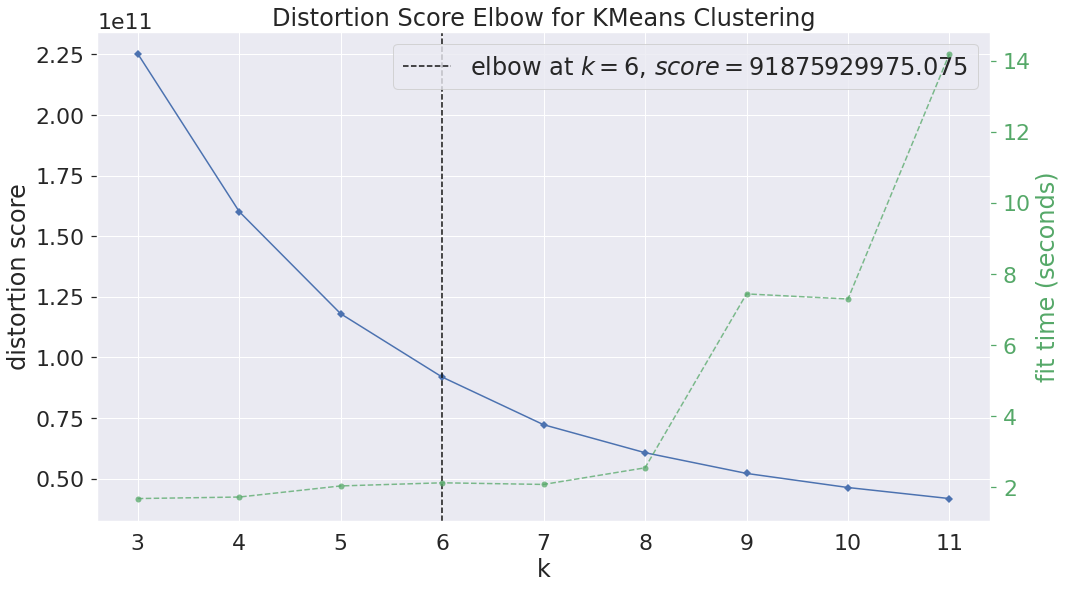

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 2)
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(olist_clustering)   
visualizer.poof()    

In [27]:
# Entraînement de nos données sur un modèle KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, max_iter=10000)
model.fit_predict(olist_clustering)
olist_clustering['cluster'] = model.labels_

/tmp/ipykernel_4288/1883947695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_clustering['cluster'] = model.labels_


(0.0, 85000.0)

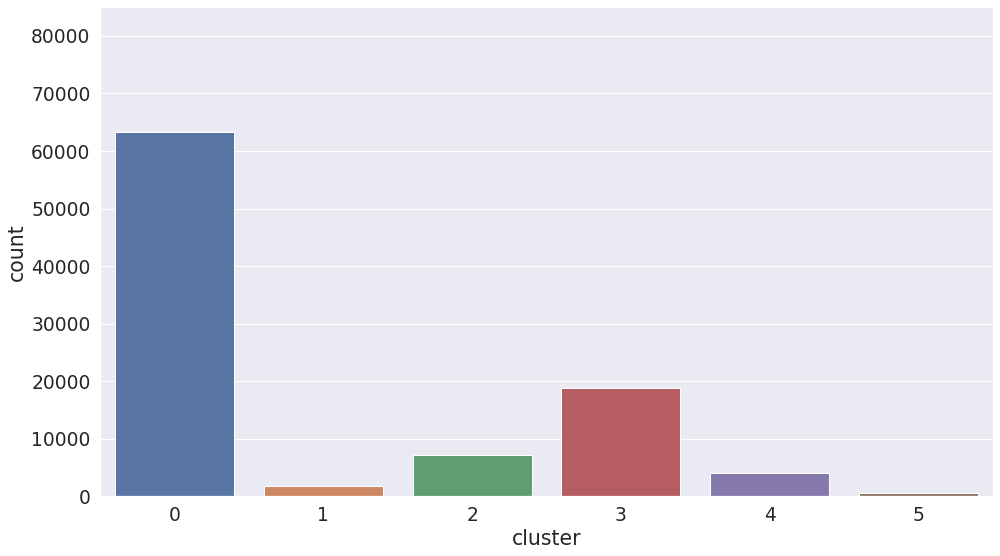

In [39]:
# Comptage des clusters 
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 1.7)
sns.countplot(data=olist_clustering, x='cluster')
plt.ylim(0, 85000)

## Profils des clients

Idem que pour la segmentation RFM, nous allons nous servir de la fonction describe pour en apprendre plus sur nos segments.

In [28]:
olist_clustering.describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,95831.000000,95831.000000,95831.000000,95831.000000,95831.000000,95831.000000,95831.000000,95831.000000
mean,1.075216,1.364454,159.593775,807.687490,2.234461,2092.716907,154.913935,0.956183
std,0.373826,2.182580,217.505618,653.756528,1.717484,3699.108561,215.370976,1.411839
min,1.000000,1.000000,9.590000,4.000000,1.000000,0.000000,1.451333,0.000000
25%,1.000000,1.000000,61.840000,361.000000,1.000000,300.000000,58.220000,0.000000
50%,1.000000,1.000000,105.280000,617.000000,1.857143,700.000000,101.060000,0.000000
75%,1.000000,1.000000,176.160000,1014.166667,3.000000,1825.000000,171.635000,2.000000
max,15.000000,231.000000,13664.080000,3992.000000,20.000000,40425.000000,13664.080000,5.000000


In [29]:
olist_clustering.loc[olist_clustering.cluster==0].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.0
mean,1.073078,1.359502,120.209076,784.379139,2.191424,481.016660,116.508413,0.0
std,0.382854,2.278800,144.619473,640.055174,1.641005,326.319402,142.807045,0.0
min,1.000000,1.000000,9.590000,4.000000,1.000000,0.000000,1.451333,0.0
25%,1.000000,1.000000,50.150000,364.000000,1.000000,200.000000,47.690000,0.0
50%,1.000000,1.000000,80.110000,602.000000,1.666667,400.000000,76.690000,0.0
75%,1.000000,1.000000,137.780000,968.000000,3.000000,700.000000,134.380000,0.0
max,15.000000,231.000000,4445.500000,3988.000000,17.000000,1350.000000,4445.500000,0.0


Produits très légers. Montant dépensé un peu en-dessous de la moyenne.

In [30]:
olist_clustering.loc[olist_clustering.cluster==1].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.0
mean,1.047826,1.378261,467.233755,938.701920,2.127953,16354.073098,457.087859,1.0
std,0.242103,2.279150,460.425505,588.173523,1.505204,2039.033590,447.577743,0.0
min,1.000000,1.000000,24.730000,61.000000,1.000000,13250.000000,12.365000,1.0
25%,1.000000,1.000000,192.550000,485.000000,1.000000,14900.000000,185.717500,1.0
50%,1.000000,1.000000,308.420000,876.000000,1.500000,16125.000000,301.270000,1.0
75%,1.000000,1.000000,595.760000,1176.000000,3.000000,17600.000000,575.425000,1.0
max,4.000000,55.000000,4950.340000,3913.000000,10.000000,21500.000000,4194.760000,1.0


Description relativement longue. Montant quasiment 3 fois plus élevé que la moyenne. Produits achetés très lourds

In [31]:
olist_clustering.loc[olist_clustering.cluster==2].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.0
mean,1.077316,1.282204,233.380097,892.388718,2.362278,5946.604463,226.020058,2.0
std,0.295110,1.605241,269.846981,642.639041,1.797607,1096.580474,268.628261,0.0
min,1.000000,1.000000,24.940000,4.000000,1.000000,4000.000000,9.900000,2.0
25%,1.000000,1.000000,116.940000,417.000000,1.000000,5000.000000,111.890000,2.0
50%,1.000000,1.000000,166.960000,708.000000,2.000000,5950.000000,162.830000,2.0
75%,1.000000,1.000000,243.925000,1164.000000,3.000000,6850.000000,237.000000,2.0
max,4.000000,78.000000,6726.660000,3954.000000,17.000000,8050.000000,6726.660000,2.0


Montant relativement supérieur à la moyenne. Description un peu plus longue. Poids 2.5 fois plus lourd que la moyenne.

In [32]:
olist_clustering.loc[olist_clustering.cluster==3].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.0
mean,1.092374,1.403265,187.177450,834.367835,2.285383,2164.105922,181.099065,3.0
std,0.408164,2.051678,243.641836,719.882995,1.860987,716.982209,243.170891,0.0
min,1.000000,1.000000,13.170000,4.000000,1.000000,750.000000,4.056000,3.0
25%,1.000000,1.000000,93.580000,340.000000,1.000000,1600.000000,88.720000,3.0
50%,1.000000,1.000000,134.290000,604.000000,1.333333,1900.000000,129.790000,3.0
75%,1.000000,1.000000,198.452500,1066.000000,3.000000,2600.000000,192.560000,3.0
max,7.000000,105.000000,13664.080000,3992.000000,18.000000,4050.000000,13664.080000,3.0


Client dans la moyenne en ce qui concerne la longueur de la description, le poids des produits ainsi que le montant dépensé.

In [33]:
olist_clustering.loc[olist_clustering.cluster==4].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.0
mean,1.046840,1.415261,293.937666,820.718501,2.447692,10121.568733,287.241901,4.0
std,0.231786,2.165579,287.145370,566.903149,1.995000,1373.437167,282.463766,0.0
min,1.000000,1.000000,19.680000,67.000000,1.000000,8000.000000,9.840000,4.0
25%,1.000000,1.000000,151.510000,421.500000,1.000000,8975.000000,148.170000,4.0
50%,1.000000,1.000000,211.980000,704.000000,2.000000,9900.000000,205.570000,4.0
75%,1.000000,1.000000,321.820000,1132.000000,3.000000,11100.000000,318.615000,4.0
max,3.000000,66.000000,4163.510000,3916.000000,20.000000,13250.000000,4163.510000,4.0


Le client dépense en moyenne 2 fois plus. Le poids des produits achetés est quant à lui près de 10 fois supérieur à la moyenne.

In [35]:
olist_clustering.loc[olist_clustering.cluster==5].describe()

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,payment_per_order,cluster
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0
mean,1.009967,1.285714,729.681628,922.426080,2.555371,26603.487265,727.862616,5.0
std,0.099418,1.499227,650.120728,590.420167,2.230123,3378.753620,651.294751,0.0
min,1.000000,1.000000,61.800000,62.000000,1.000000,21467.000000,61.800000,5.0
25%,1.000000,1.000000,314.600000,503.000000,1.000000,23049.750000,311.325000,5.0
50%,1.000000,1.000000,502.635000,708.000000,2.000000,27000.000000,501.510000,5.0
75%,1.000000,1.000000,999.097500,1226.000000,4.000000,30000.000000,999.097500,5.0
max,2.000000,21.000000,6929.310000,3863.000000,15.000000,40425.000000,6929.310000,5.0


Produits achetés très lourds, description assez longue, montant total près de 5 fois la moyenne